In [1]:
# 💧 Water Quality Analysis Project

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load dataset
df = pd.read_csv("water_potability.csv")

Dataset Shape: (3276, 10)

First 5 Rows:
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 colu

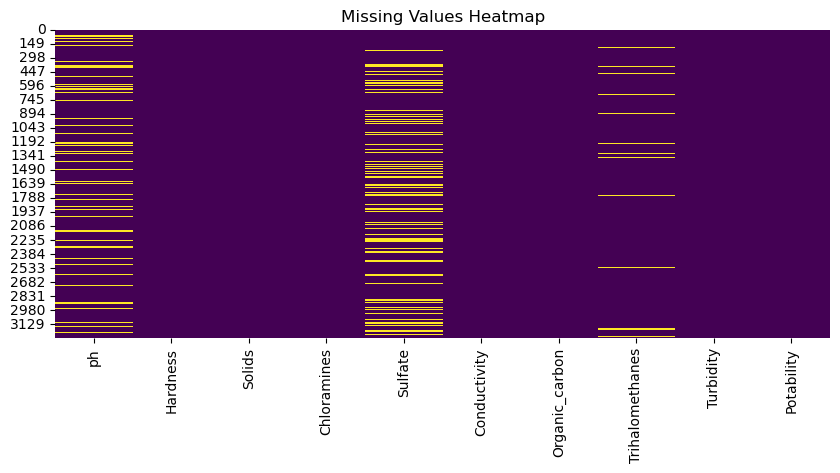

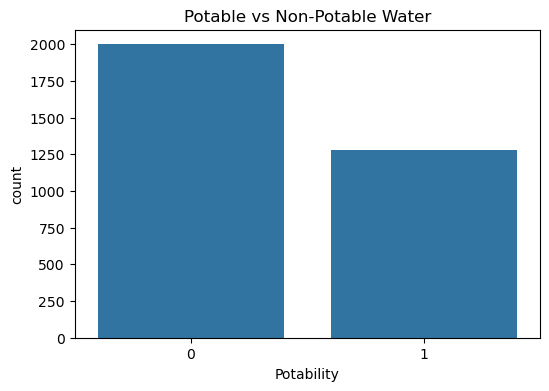

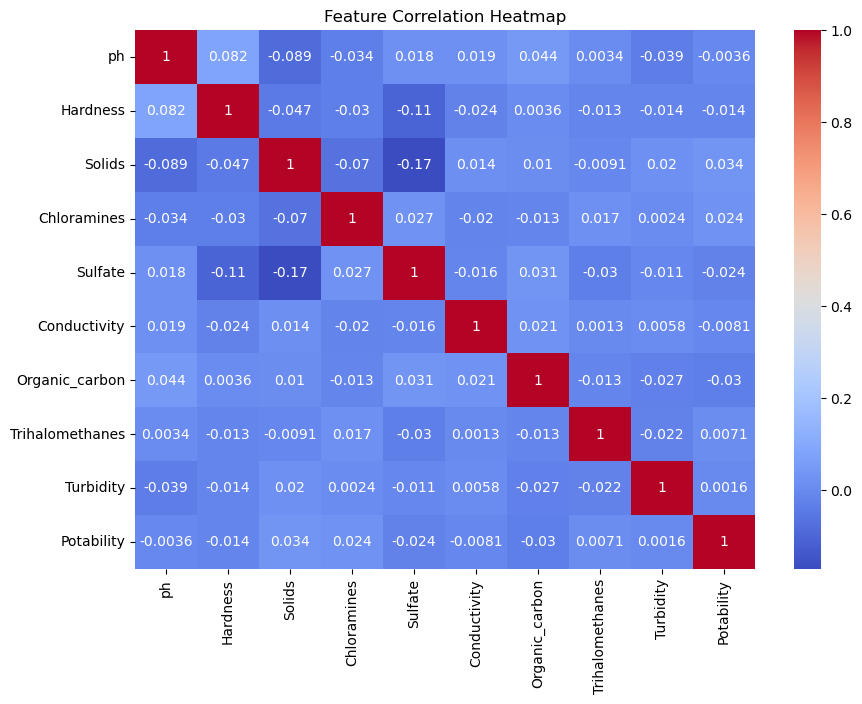

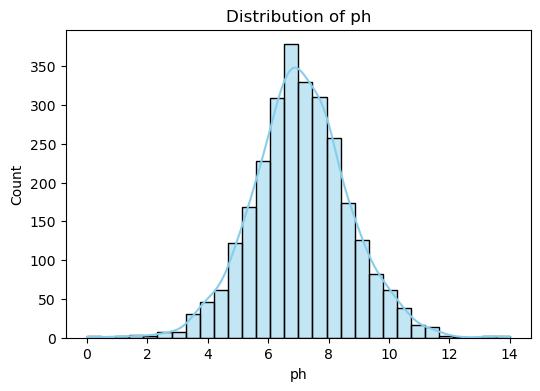

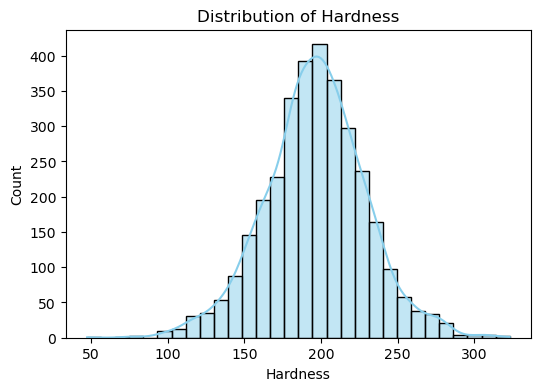

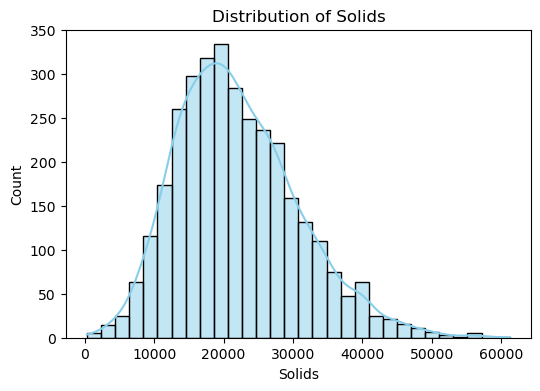

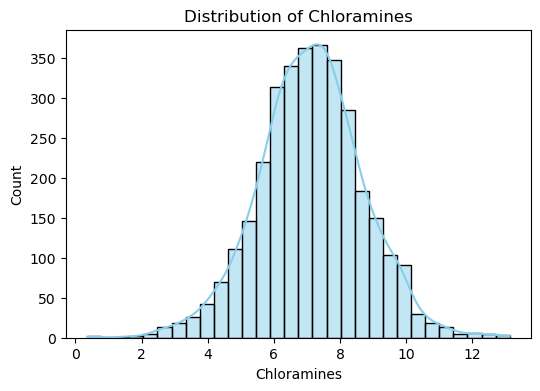

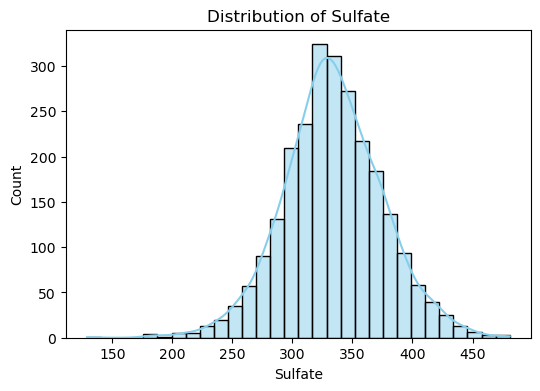

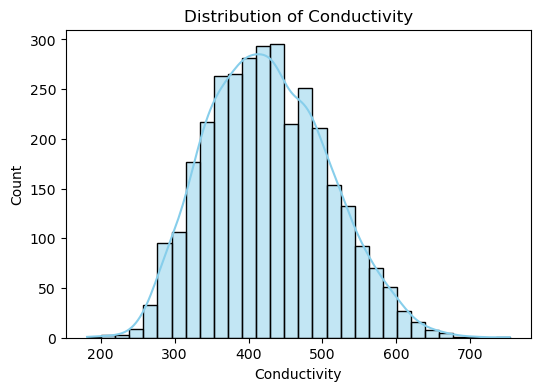

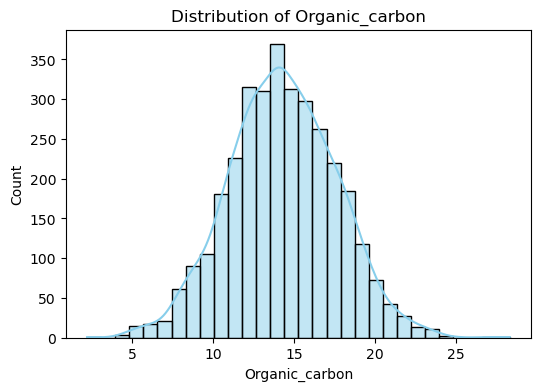

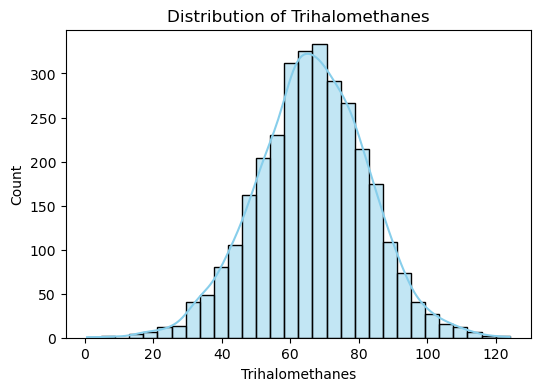

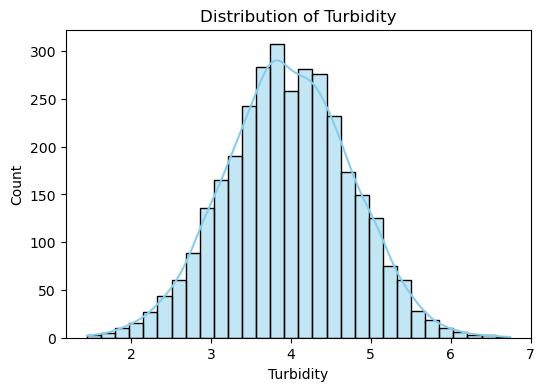

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nStatistical Summary:\n")
print(df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# ---------------- Graphs ----------------

# 1️⃣ Missing Values Heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 2️⃣ Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Potability", data=df)
plt.title("Potable vs Non-Potable Water")
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4️⃣ Distribution of Features
numeric_features = df.columns[:-1]  # all except 'Potability'
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

In [4]:
# Handle missing values
df = df.fillna(df.median())
# Remove duplicates
df = df.drop_duplicates()

In [5]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save model and scaler
pickle.dump(model, open("water_quality_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
print("✅ Model and Scaler saved successfully!")

Model Accuracy: 0.6600609756097561
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       400
           1       0.65      0.28      0.39       256

    accuracy                           0.66       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.66      0.66      0.62       656

✅ Model and Scaler saved successfully!


In [7]:
app_code = """
import streamlit as st
import pickle
import numpy as np

# Load model and scaler
model = pickle.load(open("water_quality_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("💧 Water Potability Prediction App")
st.write("Enter water quality parameters:")

ph = st.number_input("pH Value", min_value=0.0, max_value=14.0, step=0.1)
hardness = st.number_input("Hardness", step=0.1)
solids = st.number_input("Total Dissolved Solids", step=1.0)
chloramines = st.number_input("Chloramines", step=0.1)
sulfate = st.number_input("Sulfate", step=0.1)
conductivity = st.number_input("Conductivity", step=0.1)
organic_carbon = st.number_input("Organic Carbon", step=0.1)
trihalomethanes = st.number_input("Trihalomethanes", step=0.1)
turbidity = st.number_input("Turbidity", step=0.1)

if st.button("Check Potability"):
    features = np.array([[ph, hardness, solids, chloramines, sulfate,
                          conductivity, organic_carbon, trihalomethanes, turbidity]])
    features = scaler.transform(features)
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.success("✅ Water is Potable")
    else:
        st.error("❌ Water is Not Potable")
"""
print(app_code)


import streamlit as st
import pickle
import numpy as np

# Load model and scaler
model = pickle.load(open("water_quality_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("💧 Water Potability Prediction App")
st.write("Enter water quality parameters:")

ph = st.number_input("pH Value", min_value=0.0, max_value=14.0, step=0.1)
hardness = st.number_input("Hardness", step=0.1)
solids = st.number_input("Total Dissolved Solids", step=1.0)
chloramines = st.number_input("Chloramines", step=0.1)
sulfate = st.number_input("Sulfate", step=0.1)
conductivity = st.number_input("Conductivity", step=0.1)
organic_carbon = st.number_input("Organic Carbon", step=0.1)
trihalomethanes = st.number_input("Trihalomethanes", step=0.1)
turbidity = st.number_input("Turbidity", step=0.1)

if st.button("Check Potability"):
    features = np.array([[ph, hardness, solids, chloramines, sulfate,
                          conductivity, organic_carbon, trihalomethanes, turbidity]])
    feature